In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder \
    .appName('Transform and EDA') \
    .getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/08/21 23:54:28 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
df = spark.read.csv(
    r'/home/hadoop/Predict-Phone-Price/Data_collection/final_data.csv',
    header=True,
    inferSchema=True,
    sep=',',
    quote='"',
    escape='"',
    multiLine=True
)
df.show()

+--------------------+-------------+------------+-----+--------------------+-------------------+--------------------+---------------+--------+
|        Tên sản phẩm|Hãng sản xuất|Bộ nhớ trong|  Ram|        Chipset(CPU)|Kích thước màn hình| Độ phân giải Camera| Dung lượng pin|     Giá|
+--------------------+-------------+------------+-----+--------------------+-------------------+--------------------+---------------+--------+
|Samsung Galaxy A0...|      Samsung|       128GB|  4GB|           Helio G85|         6.7 inches|          50MP - 2MP|       5000 mAh| 3090000|
|iPhone 14 128GB V...|        Apple|       128GB| 6 GB|    Apple A15 Bionic|         6,1 inches|Camera góc r?ng: ...|       3,279mAh|25990000|
|INOI Note 13s 8GB...|         INOI|       256GB|  8GB| Unisoc T606 (12 nm)|         7.0 inches|    16MP - 2MP - 2MP|        5000mAh| 3390000|
|iPhone 14 Pro 128...|        Apple|       128GB|  6GB|    Apple A16 Bionic|           6.1 inch|Camera chính: 48M...|       3,200mAh|31990000|

In [4]:
df.tail(5)

[Row(Tên sản phẩm='iPhone 14 Pro Max 256GB Cũ 99% - eSIM', Hãng sản xuất='Apple', Bộ nhớ trong='256GB', Ram='6GB', Chipset(CPU)='Apple A16 Bionic (4 nm)', Kích thước màn hình='6.7', Độ phân giải Camera='48 MP, f/1.8, 24mm (góc rộng)12 MP, f/2.2, 13mm, 120˚ (góc siêu rộng)TOF 3D LiDAR scanner (depth)12 MP, f/2.8, 77mm (telephoto)', Dung lượng pin='4323mAh', Giá='35990000'),
 Row(Tên sản phẩm='iPhone 15 512GB Chính Hãng VN/A', Hãng sản xuất='Apple', Bộ nhớ trong='512GB', Ram='6GB', Chipset(CPU)='Apple A16 Bionic (4 nm)', Kích thước màn hình='6.1', Độ phân giải Camera='12 MP, f/2.4, 13mm, 120˚ (góc siêu rộng)TOF 3D LiDAR scanner (depth)48 MP, f/1.7, 26mm (góc rộng)', Dung lượng pin='3279 mAh', Giá='31999000'),
 Row(Tên sản phẩm='Samsung Galaxy S24 8GB/512GB Chính Hãng', Hãng sản xuất='Samsung', Bộ nhớ trong='256GB512GB', Ram='8GB', Chipset(CPU)='Exynos 2400 (4 nm) 10 nhân', Kích thước màn hình='6.2', Độ phân giải Camera='50 MP, f/1.8, 24mm (góc rộng), 1/1.56", 1.0µm, Dual Pixel PDAF, OIS1

In [5]:
#Xem cau truc du lieu
df.printSchema()

root
 |-- Tên sản phẩm: string (nullable = true)
 |-- Hãng sản xuất: string (nullable = true)
 |-- Bộ nhớ trong: string (nullable = true)
 |-- Ram: string (nullable = true)
 |-- Chipset(CPU): string (nullable = true)
 |-- Kích thước màn hình: string (nullable = true)
 |-- Độ phân giải Camera: string (nullable = true)
 |-- Dung lượng pin: string (nullable = true)
 |-- Giá: string (nullable = true)



In [6]:
#show the first 5 lines
df.show(5)

+--------------------+-------------+------------+----+--------------------+-------------------+--------------------+--------------+--------+
|        Tên sản phẩm|Hãng sản xuất|Bộ nhớ trong| Ram|        Chipset(CPU)|Kích thước màn hình| Độ phân giải Camera|Dung lượng pin|     Giá|
+--------------------+-------------+------------+----+--------------------+-------------------+--------------------+--------------+--------+
|Samsung Galaxy A0...|      Samsung|       128GB| 4GB|           Helio G85|         6.7 inches|          50MP - 2MP|      5000 mAh| 3090000|
|iPhone 14 128GB V...|        Apple|       128GB|6 GB|    Apple A15 Bionic|         6,1 inches|Camera góc r?ng: ...|      3,279mAh|25990000|
|INOI Note 13s 8GB...|         INOI|       256GB| 8GB| Unisoc T606 (12 nm)|         7.0 inches|    16MP - 2MP - 2MP|       5000mAh| 3390000|
|iPhone 14 Pro 128...|        Apple|       128GB| 6GB|    Apple A16 Bionic|           6.1 inch|Camera chính: 48M...|      3,200mAh|31990000|
|Samsung Gala

In [7]:
#describe
df.describe().show()

+-------+--------------------+-------------+--------------+-----+--------------------+-------------------+--------------------+--------------+--------------------+
|summary|        Tên sản phẩm|Hãng sản xuất|  Bộ nhớ trong|  Ram|        Chipset(CPU)|Kích thước màn hình| Độ phân giải Camera|Dung lượng pin|                 Giá|
+-------+--------------------+-------------+--------------+-----+--------------------+-------------------+--------------------+--------------+--------------------+
|  count|                 500|          500|           496|  491|                 492|                500|                 495|           489|                 500|
|   mean|                null|         null|          null| null|                null| 6.4347337278106576|                null|        4950.0|1.5140126865671642E7|
| stddev|                null|         null|          null| null|                null| 0.4197236407798267|                null|          null|1.2121507026761357E7|
|    min|BPhone 

Cleaning Data

In [8]:
#khai bao mot so thu vien can thiet
from pyspark.sql.functions import col, regexp_replace, trim, udf
from pyspark.sql.types import StringType

print('-- Importing success')

-- Importing success


In [9]:
# Loại bỏ khoảng trắng thừa giữa số và đơn vị trong cột "Ram" và "Bộ nhớ trong"
df = df.withColumn("Ram", regexp_replace(col("Ram"), r"\s+(?=[A-Za-z])", ""))\
       .withColumn("Bộ nhớ trong", regexp_replace(col("Bộ nhớ trong"), r"\s+(?=[A-Za-z])", ""))\
       .withColumn("Dung lượng pin", regexp_replace(col("Dung lượng pin"), r"\s+(?=[A-Za-z])", ""))
# Hiển thị một số dòng đầu tiên
df.show(5)

+--------------------+-------------+------------+---+--------------------+-------------------+--------------------+--------------+--------+
|        Tên sản phẩm|Hãng sản xuất|Bộ nhớ trong|Ram|        Chipset(CPU)|Kích thước màn hình| Độ phân giải Camera|Dung lượng pin|     Giá|
+--------------------+-------------+------------+---+--------------------+-------------------+--------------------+--------------+--------+
|Samsung Galaxy A0...|      Samsung|       128GB|4GB|           Helio G85|         6.7 inches|          50MP - 2MP|       5000mAh| 3090000|
|iPhone 14 128GB V...|        Apple|       128GB|6GB|    Apple A15 Bionic|         6,1 inches|Camera góc r?ng: ...|      3,279mAh|25990000|
|INOI Note 13s 8GB...|         INOI|       256GB|8GB| Unisoc T606 (12 nm)|         7.0 inches|    16MP - 2MP - 2MP|       5000mAh| 3390000|
|iPhone 14 Pro 128...|        Apple|       128GB|6GB|    Apple A16 Bionic|           6.1 inch|Camera chính: 48M...|      3,200mAh|31990000|
|Samsung Galaxy Z ..

In [10]:
# Đổi tên cột "Bộ nhớ trong" thành "Rom"
df = df.withColumnRenamed("Bộ nhớ trong", "Rom")

# Xem cấu trúc dữ liệu
df.printSchema()

root
 |-- Tên sản phẩm: string (nullable = true)
 |-- Hãng sản xuất: string (nullable = true)
 |-- Rom: string (nullable = true)
 |-- Ram: string (nullable = true)
 |-- Chipset(CPU): string (nullable = true)
 |-- Kích thước màn hình: string (nullable = true)
 |-- Độ phân giải Camera: string (nullable = true)
 |-- Dung lượng pin: string (nullable = true)
 |-- Giá: string (nullable = true)



In [11]:
# Thay thế dấu phẩy bằng dấu chấm trong cột "Kích thước màn hình"
df = df.withColumn("Kích thước màn hình", regexp_replace(col("Kích thước màn hình"), ",", "."))

# Thay thế "inch" bằng "inches" trong cột "Kích thước màn hình"
df = df.withColumn("Kích thước màn hình", regexp_replace(col("Kích thước màn hình"), "inch$", "inches"))

# Hiển thị một số dòng đầu tiên
df.show(5)

+--------------------+-------------+-----+---+--------------------+-------------------+--------------------+--------------+--------+
|        Tên sản phẩm|Hãng sản xuất|  Rom|Ram|        Chipset(CPU)|Kích thước màn hình| Độ phân giải Camera|Dung lượng pin|     Giá|
+--------------------+-------------+-----+---+--------------------+-------------------+--------------------+--------------+--------+
|Samsung Galaxy A0...|      Samsung|128GB|4GB|           Helio G85|         6.7 inches|          50MP - 2MP|       5000mAh| 3090000|
|iPhone 14 128GB V...|        Apple|128GB|6GB|    Apple A15 Bionic|         6.1 inches|Camera góc r?ng: ...|      3,279mAh|25990000|
|INOI Note 13s 8GB...|         INOI|256GB|8GB| Unisoc T606 (12 nm)|         7.0 inches|    16MP - 2MP - 2MP|       5000mAh| 3390000|
|iPhone 14 Pro 128...|        Apple|128GB|6GB|    Apple A16 Bionic|         6.1 inches|Camera chính: 48M...|      3,200mAh|31990000|
|Samsung Galaxy Z ...|      Samsung|256GB|8Gb|Snapdragon 8 Gen ...|  

In [12]:
# Loại bỏ dấu phẩy trong cột "Dung lượng pin"
df = df.withColumn("Dung lượng pin", regexp_replace(col("Dung lượng pin"), ",", ""))

# Hiển thị một số dòng đầu tiên
df.show(5)

+--------------------+-------------+-----+---+--------------------+-------------------+--------------------+--------------+--------+
|        Tên sản phẩm|Hãng sản xuất|  Rom|Ram|        Chipset(CPU)|Kích thước màn hình| Độ phân giải Camera|Dung lượng pin|     Giá|
+--------------------+-------------+-----+---+--------------------+-------------------+--------------------+--------------+--------+
|Samsung Galaxy A0...|      Samsung|128GB|4GB|           Helio G85|         6.7 inches|          50MP - 2MP|       5000mAh| 3090000|
|iPhone 14 128GB V...|        Apple|128GB|6GB|    Apple A15 Bionic|         6.1 inches|Camera góc r?ng: ...|       3279mAh|25990000|
|INOI Note 13s 8GB...|         INOI|256GB|8GB| Unisoc T606 (12 nm)|         7.0 inches|    16MP - 2MP - 2MP|       5000mAh| 3390000|
|iPhone 14 Pro 128...|        Apple|128GB|6GB|    Apple A16 Bionic|         6.1 inches|Camera chính: 48M...|       3200mAh|31990000|
|Samsung Galaxy Z ...|      Samsung|256GB|8Gb|Snapdragon 8 Gen ...|  

In [13]:
from pyspark.sql.functions import when

# Thay thế các giá trị 'Liên hệ' hoặc 'NULL' trong cột 'Giá' bằng '0'
df = df.withColumn("Giá", when((col("Giá") == "Liên hệ") | (col("Giá").isNull()), "0").otherwise(col("Giá")))

# Hiển thị một số dòng đầu tiên
df.show(10)

+--------------------+-------------+-----+---+--------------------+-------------------+--------------------+--------------+--------+
|        Tên sản phẩm|Hãng sản xuất|  Rom|Ram|        Chipset(CPU)|Kích thước màn hình| Độ phân giải Camera|Dung lượng pin|     Giá|
+--------------------+-------------+-----+---+--------------------+-------------------+--------------------+--------------+--------+
|Samsung Galaxy A0...|      Samsung|128GB|4GB|           Helio G85|         6.7 inches|          50MP - 2MP|       5000mAh| 3090000|
|iPhone 14 128GB V...|        Apple|128GB|6GB|    Apple A15 Bionic|         6.1 inches|Camera góc r?ng: ...|       3279mAh|25990000|
|INOI Note 13s 8GB...|         INOI|256GB|8GB| Unisoc T606 (12 nm)|         7.0 inches|    16MP - 2MP - 2MP|       5000mAh| 3390000|
|iPhone 14 Pro 128...|        Apple|128GB|6GB|    Apple A16 Bionic|         6.1 inches|Camera chính: 48M...|       3200mAh|31990000|
|Samsung Galaxy Z ...|      Samsung|256GB|8Gb|Snapdragon 8 Gen ...|  

In [14]:
from pyspark.sql.functions import count

# Kiểm tra giá trị missing
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+------------+-------------+---+---+------------+-------------------+-------------------+--------------+---+
|Tên sản phẩm|Hãng sản xuất|Rom|Ram|Chipset(CPU)|Kích thước màn hình|Độ phân giải Camera|Dung lượng pin|Giá|
+------------+-------------+---+---+------------+-------------------+-------------------+--------------+---+
|           0|            0|  4|  9|           8|                  0|                  5|            11|  0|
+------------+-------------+---+---+------------+-------------------+-------------------+--------------+---+



In [15]:
# Lọc ra các bản ghi có ít nhất một giá trị missing
df_missing = df.filter(
    (col("Tên sản phẩm").isNull()) |
    (col("Hãng sản xuất").isNull()) |
    (col("Rom").isNull()) |
    (col("Ram").isNull()) |
    (col("Chipset(CPU)").isNull()) |
    (col("Kích thước màn hình").isNull()) |
    (col("Độ phân giải Camera").isNull()) |
    (col("Dung lượng pin").isNull()) |
    (col("Giá").isNull())
)

# Hiển thị các bản ghi có giá trị missing
df_missing.show(truncate=False)

+---------------------------------------------------------+-------------+-----+----+------------------------------------------+----------------------------------+---------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------+--------+
|Tên sản phẩm                                             |Hãng sản xuất|Rom  |Ram |Chipset(CPU)                              |Kích thước màn hình               |Độ phân giải Camera                                                                                                        |Dung lượng pin                                                                                                            |Giá     |
+---------------------------------------------------------+-------------+-----+----+------------------------------------------+----------------------------------+

In [16]:
# Thay thế từng chuỗi cụ thể
df = df.withColumn(
    "Tên sản phẩm",
    regexp_replace(
        col("Tên sản phẩm"),
        r'- T.*',  # Thay thế phần nào có dấu "-"
        ''
    )
).withColumn(
    "Tên sản phẩm",
    regexp_replace(
        col("Tên sản phẩm"),
        r'– S.*',  # Thay thế chuỗi cụ thể
        ''
    )
)

# Hiển thị kết quả để kiểm tra
df.select("Tên sản phẩm").show(truncate=False)

+---------------------------------------------+
|Tên sản phẩm                                 |
+---------------------------------------------+
|Samsung Galaxy A05 (4G) 4GB 128GB Chính Hãng |
|iPhone 14 128GB VNA                          |
|INOI Note 13s 8GB 256GB Chính Hãng           |
|iPhone 14 Pro 128GB VN/A                     |
|Samsung Galaxy Z Flip5 8GB 256GB Chính Hãng  |
|Xiaomi Redmi Pad SE 6GB 128GB Box            |
|Samsung Galaxy S22 (5G) 8GB 256GB Chính hãng |
|Oppo Reno 7 (5G) 8GB 256GB Chính hãng        |
|Xiaomi Poco X3 GT 8GB 128GB Chính Hãng       |
|Xiaomi Redmi A2 2GB 32GB Chính Hãng          |
|Xiaomi Redmi K70 Pro 16GB 256GB Box          |
|Xiaomi Redmi Note 11T Pro (5G) 8GB 256GB Box |
|Realme GT Neo 2T 12GB 256GB Box              |
|Samsung Galaxy A54 (5G) 8GB 256GB Chính Hãng |
|Xiaomi Redmi K70E 12GB 256GB Box             |
|Xiaomi Poco M4 (5G) 4GB 64GB Chính Hãng      |
|iPhone 15 128GB VN/A                         |
|INOI 240 (4G) Chính Hãng               

In [17]:
# Loại bỏ khoảng trắng thừa ở đầu và cuối chuỗi
df = df.withColumn(
    "Tên sản phẩm",
    trim(col("Tên sản phẩm"))
)

# Hiển thị kết quả để kiểm tra
df.show(truncate=False)


+---------------------------------------------+-------------+-----+----+---------------------------------------------+-------------------+---------------------------------------------------------------+--------------+--------+
|Tên sản phẩm                                 |Hãng sản xuất|Rom  |Ram |Chipset(CPU)                                 |Kích thước màn hình|Độ phân giải Camera                                            |Dung lượng pin|Giá     |
+---------------------------------------------+-------------+-----+----+---------------------------------------------+-------------------+---------------------------------------------------------------+--------------+--------+
|Samsung Galaxy A05 (4G) 4GB 128GB Chính Hãng |Samsung      |128GB|4GB |Helio G85                                    |6.7 inches         |50MP - 2MP                                                     |5000mAh       |3090000 |
|iPhone 14 128GB VNA                          |Apple        |128GB|6GB |Apple A15 Bionic    

In [18]:
# Cập nhật giá trị cho cột "Dung lượng pin" của sản phẩm "iPhone SE 3 2022 256GB"
df = df.withColumn(
    "Dung lượng pin",
    when(col("Tên sản phẩm") == "iPhone SE 3 2022 256GB", "2018mAh").otherwise(col("Dung lượng pin"))
)
df = df.withColumn(
    "Ram",
    when(col("Tên sản phẩm") == "iPhone SE 3 2022 256GB", "4GB").otherwise(col("Ram"))
)

# Kiểm tra lại kết quả
df.filter(col("Tên sản phẩm") == "iPhone SE 3 2022 256GB").show()

+--------------------+-------------+-----+---+----------------+-------------------+-------------------+--------------+---+
|        Tên sản phẩm|Hãng sản xuất|  Rom|Ram|    Chipset(CPU)|Kích thước màn hình|Độ phân giải Camera|Dung lượng pin|Giá|
+--------------------+-------------+-----+---+----------------+-------------------+-------------------+--------------+---+
|iPhone SE 3 2022 ...|        Apple|256GB|4GB|Apple A15 Bionic|         4.7 inches|              12 MP|       2018mAh|  0|
+--------------------+-------------+-----+---+----------------+-------------------+-------------------+--------------+---+



In [19]:
# Cập nhật giá trị cho cột "Dung lượng pin" của sản phẩm "iPhone 14 Plus 256GB VNA"
df = df.withColumn(
    "Dung lượng pin",
    when(col("Tên sản phẩm") == "iPhone 14 Plus 256GB VNA", "4325mAh").otherwise(col("Dung lượng pin"))
)

# Kiểm tra lại kết quả
df.filter(col("Tên sản phẩm") == "iPhone 14 Plus 256GB VNA").show()

+--------------------+-------------+-----+---+----------------+-------------------+--------------------+--------------+--------+
|        Tên sản phẩm|Hãng sản xuất|  Rom|Ram|    Chipset(CPU)|Kích thước màn hình| Độ phân giải Camera|Dung lượng pin|     Giá|
+--------------------+-------------+-----+---+----------------+-------------------+--------------------+--------------+--------+
|iPhone 14 Plus 25...|        Apple|256GB|6GB|Apple A15 Bionic|         6.7 inches|Camera chính 12MP...|       4325mAh|31990000|
+--------------------+-------------+-----+---+----------------+-------------------+--------------------+--------------+--------+



In [20]:
# Cập nhật giá trị cho cột "Dung lượng pin" của sản phẩm "Xiaomi Redmi Note 14 (5G)"
df = df.withColumn(
    "Dung lượng pin",
    when(col("Tên sản phẩm") == "Xiaomi Redmi Note 14 (5G)", "4610mAh").otherwise(col("Dung lượng pin"))
)
# Thêm giá trị cho các cột Ram và Rom cho sản phẩm được chỉ định
df = df.withColumn("Ram",
                   when(col("Tên sản phẩm") == "Xiaomi Redmi Note 14 (5G)", "6GB").otherwise(col("Ram")))

df = df.withColumn("Rom",
                   when(col("Tên sản phẩm") == "Xiaomi Redmi Note 14 (5G)", "128GB").otherwise(col("Rom")))

# Kiểm tra lại kết quả
df.filter(col("Tên sản phẩm") == "Xiaomi Redmi Note 14 (5G)").show()

+--------------------+-------------+-----+---+--------------------+--------------------+-------------------+--------------+---+
|        Tên sản phẩm|Hãng sản xuất|  Rom|Ram|        Chipset(CPU)| Kích thước màn hình|Độ phân giải Camera|Dung lượng pin|Giá|
+--------------------+-------------+-----+---+--------------------+--------------------+-------------------+--------------+---+
|Xiaomi Redmi Note...|       Xiaomi|128GB|6GB|MediaTek Dimensit...|AMOLED. 6.67 inch...|      108 MP - 2 MP|       4610mAh|  0|
+--------------------+-------------+-----+---+--------------------+--------------------+-------------------+--------------+---+



In [21]:
# Cập nhật giá trị cho cột "Dung lượng pin" của sản phẩm "iPhone 14 Plus 128GB VNA"
df = df.withColumn(
    "Dung lượng pin",
    when(col("Tên sản phẩm") == "iPhone 14 Plus 128GB VNA", "4325mAh").otherwise(col("Dung lượng pin"))
)

# Kiểm tra lại kết quả
df.filter(col("Tên sản phẩm") == "iPhone 14 Plus 128GB VNA").show()


+--------------------+-------------+-----+---+----------------+-------------------+--------------------+--------------+--------+
|        Tên sản phẩm|Hãng sản xuất|  Rom|Ram|    Chipset(CPU)|Kích thước màn hình| Độ phân giải Camera|Dung lượng pin|     Giá|
+--------------------+-------------+-----+---+----------------+-------------------+--------------------+--------------+--------+
|iPhone 14 Plus 12...|        Apple|128GB|6GB|Apple A15 Bionic|         6.7 inches|Camera chính 12MP...|       4325mAh|28990000|
+--------------------+-------------+-----+---+----------------+-------------------+--------------------+--------------+--------+



In [22]:
# Cập nhật giá trị cho cột "Dung lượng pin" của sản phẩm "Nokia 5710 Xpress Audio"
df = df.withColumn(
    "Dung lượng pin",
    when(col("Tên sản phẩm") == "Nokia 5710 Xpress Audio", "1450mAh").otherwise(col("Dung lượng pin"))
)
# Thêm giá trị cho cột Ram cho sản phẩm được chỉ định
df = df.withColumn("Ram",
                   when(col("Tên sản phẩm") == "Nokia 5710 Xpress Audio", "48MB").otherwise(col("Ram")))

# Kiểm tra lại kết quả
df.filter(col("Tên sản phẩm") == "Nokia 5710 Xpress Audio").show()

+--------------------+-------------+-----+----+-------------------+-------------------+-------------------+--------------+-------+
|        Tên sản phẩm|Hãng sản xuất|  Rom| Ram|       Chipset(CPU)|Kích thước màn hình|Độ phân giải Camera|Dung lượng pin|    Giá|
+--------------------+-------------+-----+----+-------------------+-------------------+-------------------+--------------+-------+
|Nokia 5710 Xpress...|        Nokia|128MB|48MB|Unisoc T107 (22 nm)|         2.4 inches|             0.3 MP|       1450mAh|1790000|
+--------------------+-------------+-----+----+-------------------+-------------------+-------------------+--------------+-------+



In [23]:
# Thêm giá trị '4GB' vào cột Ram cho sản phẩm 'iPhone SE 3 2022 256GB'
df = df.withColumn(
    "Ram",
    when(col("Tên sản phẩm") == "iPhone SE 3 2022 256GB", "4GB")
    .otherwise(col("Ram"))
)
df = df.withColumn(
    "Dung lượng pin",
    when(col("Tên sản phẩm") == "iPhone SE 3 2022 256GB", "2018mAh")
    .otherwise(col("Dung lượng pin"))
)

In [24]:
# Thêm giá trị cho cột Ram cho sản phẩm được chỉ định
df = df.withColumn("Ram",
                   when(col("Tên sản phẩm") == "iPhone 13 128GB chính hãng VN/A", "4GB").otherwise(col("Ram")))

In [25]:
# Thêm giá trị cho cột Ram
df = df.withColumn("Ram",
                   when(col("Tên sản phẩm") == "iPhone SE 3 2022 64GB", "4GB").otherwise(col("Ram")))

# Thêm giá trị cho cột Dung lượng pin
df = df.withColumn("Dung lượng pin",
                   when(col("Tên sản phẩm") == "iPhone SE 3 2022 64GB", "1821mAh").otherwise(col("Dung lượng pin")))

In [26]:
# Thêm giá trị vào cột Chipset(CPU)
df = df.withColumn("Chipset(CPU)",
                   when(col("Tên sản phẩm") == "Nokia 105 DS (2019)", "Unisoc T107").otherwise(col("Chipset(CPU)")))

# Thêm giá trị vào cột Dung lượng pin
df = df.withColumn("Dung lượng pin",
                   when(col("Tên sản phẩm") == "Nokia 105 DS (2019)", "800mAh").otherwise(col("Dung lượng pin")))
df = df.withColumn("Giá",
                   when(col("Tên sản phẩm") == "Nokia 105 DS (2019)", "0").otherwise(col("Giá")))


In [27]:
# Thêm giá trị cho cột Ram cho sản phẩm được chỉ định
df = df.withColumn("Ram",
                   when(col("Tên sản phẩm") == "iPhone SE 3 2022 128GB", "4GB").otherwise(col("Ram")))

# Thêm giá trị vào cột Dung lượng pin
df = df.withColumn("Dung lượng pin",
                   when(col("Tên sản phẩm") == "iPhone SE 3 2022 128GB", "2018mAh").otherwise(col("Dung lượng pin")))

In [28]:
# Cập nhật các giá trị mới
df = df.withColumn("Ram",
                   when(col("Tên sản phẩm") == "Nokia 110 4G Pro (2023) Chính Hãng", "48GB").otherwise(col("Ram")))

df = df.withColumn("Rom",
                   when(col("Tên sản phẩm") == "Nokia 110 4G Pro (2023) Chính Hãng", "128GB").otherwise(col("Rom")))

df = df.withColumn("Dung lượng pin",
                   when(col("Tên sản phẩm") == "Nokia 110 4G Pro (2023) Chính Hãng", "1450 mAh").otherwise(col("Dung lượng pin")))


In [29]:
# Cập nhật các giá trị mới
df = df.withColumn("Ram",
                   when(col("Tên sản phẩm") == "Nokia 105 4G Pro (2023) Chính Hãng", "48MB").otherwise(col("Ram")))

df = df.withColumn("Rom",
                   when(col("Tên sản phẩm") == "Nokia 105 4G Pro (2023) Chính Hãng", "128MB").otherwise(col("Rom")))

df = df.withColumn("Độ phân giải Camera",
                   when(col("Tên sản phẩm") == "Nokia 105 4G Pro (2023) Chính Hãng", "QQVGA (120 x 160 Pixels)").otherwise(col("Độ phân giải Camera")))

In [30]:
# Loại bỏ các bản ghi có giá trị "INOI 288S (4G) Chính Hãng" trong cột "Tên sản phẩm"
df = df.filter(col("Tên sản phẩm") != "INOI 288S (4G) Chính Hãng")

In [31]:
# Cập nhật giá trị mới cho cột "Chipset(CPU)"
df = df.withColumn("Chipset(CPU)",
                   when(col("Tên sản phẩm") == "Xiaomi Redmi Note 12 Pro Plus 8GB 256GB Likenew Fullbox", "Mediatek MT6877V Dimensity 1080 (6 nm) 8 nhân (2x2.6 GHz & 6x2.0 GHz)").otherwise(col("Chipset(CPU)")))

df = df.withColumn("Độ phân giải Camera",
                   when(col("Tên sản phẩm") == "Xiaomi Redmi Note 12 Pro Plus 8GB 256GB Likenew Fullbox", "200 MP").otherwise(col("Độ phân giải Camera")))

df = df.withColumn("Dung lượng pin",
                   when(col("Tên sản phẩm") == "Xiaomi Redmi Note 12 Pro Plus 8GB 256GB Likenew Fullbox", "5000 mAh").otherwise(col("Dung lượng pin")))# Cập nhật giá trị mới cho cột "Chipset(CPU)"
df = df.withColumn("Chipset(CPU)",
                   when(col("Tên sản phẩm") == "Xiaomi Redmi Note 12 Pro Plus 8GB 256GB Likenew Fullbox", "Mediatek MT6877V Dimensity 1080 (6 nm) 8 nhân (2x2.6 GHz & 6x2.0 GHz)").otherwise(col("Chipset(CPU)")))

df = df.withColumn("Độ phân giải Camera",
                   when(col("Tên sản phẩm") == "Xiaomi Redmi Note 12 Pro Plus 8GB 256GB Likenew Fullbox", "200 MP").otherwise(col("Độ phân giải Camera")))

df = df.withColumn("Dung lượng pin",
                   when(col("Tên sản phẩm") == "Xiaomi Redmi Note 12 Pro Plus 8GB 256GB Likenew Fullbox", "5000 mAh").otherwise(col("Dung lượng pin")))

In [32]:
# Cập nhật giá trị mới cho cột "Chipset(CPU)"
df = df.withColumn("Chipset(CPU)",
                   when(col("Tên sản phẩm") == "Xiaomi Redmi Note 12 Turbo 12GB 512GB Box", "Qualcomm SM7475-AB Snapdragon 7+ Gen 2 (4 nm)").otherwise(col("Chipset(CPU)")))

In [33]:
# Lọc ra các bản ghi có ít nhất một giá trị missing và chỉ lấy cột "Tên sản phẩm"
df_missing = df.filter(
    (col("Tên sản phẩm").isNull()) |
    (col("Hãng sản xuất").isNull()) |
    (col("Rom").isNull()) |
    (col("Ram").isNull()) |
    (col("Chipset(CPU)").isNull()) |
    (col("Kích thước màn hình").isNull()) |
    (col("Độ phân giải Camera").isNull()) |
    (col("Dung lượng pin").isNull()) |
    (col("Giá").isNull())
)

# Hiển thị các bản ghi có giá trị missing
df_missing.show(truncate=False)

+-----------------------------------------+-------------+-----+----+------------------------------------------+----------------------------------+---------------------------------------------------------------------------------------------------------------------------------------+--------------+--------+
|Tên sản phẩm                             |Hãng sản xuất|Rom  |Ram |Chipset(CPU)                              |Kích thước màn hình               |Độ phân giải Camera                                                                                                                    |Dung lượng pin|Giá     |
+-----------------------------------------+-------------+-----+----+------------------------------------------+----------------------------------+---------------------------------------------------------------------------------------------------------------------------------------+--------------+--------+
|Nokia 105 DS (2019)                      |NOKIA        |4GB  |4GB |Unisoc T107

In [34]:
# Thêm giá trị '64MP' vào cột 'Độ phân giải Camera' cho sản phẩm 'Xiaomi 11 Lite (5G) 8GB 128GB Chính Hãng'
df = df.withColumn("Độ phân giải Camera",
                   when(col("Tên sản phẩm") == "Xiaomi 11 Lite (5G) 8GB 128GB Chính Hãng", "64MP")
                   .otherwise(col("Độ phân giải Camera")))

In [35]:
# Thêm giá trị '5000mAh' vào cột 'Dung lượng pin' cho sản phẩm 'Realme C55 (4G) 6GB 128GB Chính Hãng'
df = df.withColumn("Dung lượng pin",
                   when(col("Tên sản phẩm") == "Realme C55 (4G) 6GB 128GB Chính Hãng", "5000mAh")
                   .otherwise(col("Dung lượng pin")))

In [36]:
# Thêm giá trị '3349mAh' vào cột 'Dung lượng pin' cho sản phẩm 'iPhone 15 256GB VN/A'
df = df.withColumn("Dung lượng pin",
                   when(col("Tên sản phẩm") == "iPhone 15 256GB VN/A", "3349mAh")
                   .otherwise(col("Dung lượng pin")))

In [37]:
# Thêm giá trị 'Qualcomm SM7475-AB Snapdragon 7+ Gen 2 (4 nm)' vào cột 'Chipset(CPU)' cho sản phẩm 'Xiaomi Redmi Note 12 Turbo 16GB 1TB Box'
df = df.withColumn("Chipset(CPU)",
                   when(col("Tên sản phẩm") == "Xiaomi Redmi Note 12 Turbo 16GB 1TB Box",
                        "Qualcomm SM7475-AB Snapdragon 7+ Gen 2 (4 nm)")
                   .otherwise(col("Chipset(CPU)")))

In [38]:
df = df.withColumn("Chipset(CPU)",
                   when(col("Tên sản phẩm") == "Xiaomi Redmi Note 12 Turbo 12GB 256GB Box",
                        "Qualcomm Snapdragon 7+ Gen 2")
                   .otherwise(col("Chipset(CPU)")))

In [39]:
# Thêm giá trị 'A17 Bionic' vào cột 'Chipset(CPU)' cho sản phẩm 'iPhone 15 Pro 128GB VN/A'
df = df.withColumn("Chipset(CPU)",
                   when(col("Tên sản phẩm") == "iPhone 15 Pro 128GB VN/A", "A17 Bionic")
                   .otherwise(col("Chipset(CPU)")))

# Thêm giá trị '3274mAh' vào cột 'Dung lượng pin' cho sản phẩm 'iPhone 15 Pro 128GB VN/A'
df = df.withColumn("Dung lượng pin",
                   when(col("Tên sản phẩm") == "iPhone 15 Pro 128GB VN/A", "3274mAh")
                   .otherwise(col("Dung lượng pin")))

In [40]:
# Thêm giá trị 'Qualcomm SM7475-AB Snapdragon 7+ Gen 2 (4 nm)' vào cột 'Chipset(CPU)' cho sản phẩm 'Xiaomi Redmi Note 12 Turbo 16GB 256GB Box'
df = df.withColumn("Chipset(CPU)",
                   when(col("Tên sản phẩm") == "Xiaomi Redmi Note 12 Turbo 16GB 256GB Box",
                        "Qualcomm SM7475-AB Snapdragon 7+ Gen 2 (4 nm)")
                   .otherwise(col("Chipset(CPU)")))

In [41]:
# Lọc ra các bản ghi có ít nhất một giá trị missing và chỉ lấy cột "Tên sản phẩm"
df_missing = df.filter(
    (col("Tên sản phẩm").isNull()) |
    (col("Hãng sản xuất").isNull()) |
    (col("Rom").isNull()) |
    (col("Ram").isNull()) |
    (col("Chipset(CPU)").isNull()) |
    (col("Kích thước màn hình").isNull()) |
    (col("Độ phân giải Camera").isNull()) |
    (col("Dung lượng pin").isNull()) |
    (col("Giá").isNull())
)

# Hiển thị các bản ghi có giá trị missing
df_missing.show(truncate=False)

+------------------------------------+-------------+-----+----+------------------------------------------+----------------------------------+---------------------------------------------------------------------------------------------------------------------------+--------------+-------+
|Tên sản phẩm                        |Hãng sản xuất|Rom  |Ram |Chipset(CPU)                              |Kích thước màn hình               |Độ phân giải Camera                                                                                                        |Dung lượng pin|Giá    |
+------------------------------------+-------------+-----+----+------------------------------------------+----------------------------------+---------------------------------------------------------------------------------------------------------------------------+--------------+-------+
|Nokia 105 DS (2019)                 |NOKIA        |4GB  |4GB |Unisoc T107                               |1.77". QQVGA. TFT. 120 x 16

In [42]:
df = df.withColumn("Độ phân giải Camera",
                   when(col("Tên sản phẩm") == "Nokia 105 DS (2019)",
                        0)
                   .otherwise(col("Độ phân giải Camera")))

In [45]:
df = df.withColumn("Độ phân giải Camera",
                   when(col("Tên sản phẩm") == "Nokia 105 DS 4G                     ",
                        0)
                   .otherwise(col("Độ phân giải Camera")))

In [44]:
df = df.withColumn("Dung lượng pin",
                   when(col("Tên sản phẩm") == "Xiaomi Redmi K60 (5G) 16GB 256GB Box",
                        '5500mAh')
                   .otherwise(col("Dung lượng pin")))

In [46]:
df_missing = df.filter(
    (col("Tên sản phẩm").isNull()) |
    (col("Hãng sản xuất").isNull()) |
    (col("Rom").isNull()) |
    (col("Ram").isNull()) |
    (col("Chipset(CPU)").isNull()) |
    (col("Kích thước màn hình").isNull()) |
    (col("Độ phân giải Camera").isNull()) |
    (col("Dung lượng pin").isNull()) |
    (col("Giá").isNull())
)

# Hiển thị các bản ghi có giá trị missing
df_missing.show(truncate=False)

+------------+-------------+---+---+------------+-------------------+-------------------+--------------+---+
|Tên sản phẩm|Hãng sản xuất|Rom|Ram|Chipset(CPU)|Kích thước màn hình|Độ phân giải Camera|Dung lượng pin|Giá|
+------------+-------------+---+---+------------+-------------------+-------------------+--------------+---+
+------------+-------------+---+---+------------+-------------------+-------------------+--------------+---+



In [47]:
# Chuyển sang Dataframe của pandas và ghi file csv sau khi làm sạch
pandas_df = df.toPandas()

pandas_df.to_csv('cleaned_batch_data.csv', index=False)


EDA

In [2]:
import pandas as pd

print('-- Importing success')

-- Importing success


In [49]:
df = pd.read_csv('/home/hadoop/Predict-Phone-Price/Tranform_data/cleaned_batch_data.csv')
df.isna().sum()

Tên sản phẩm           0
Hãng sản xuất          0
Rom                    0
Ram                    0
Chipset(CPU)           0
Kích thước màn hình    0
Độ phân giải Camera    0
Dung lượng pin         0
Giá                    0
dtype: int64

In [50]:
#Lay ra so trong Rom
df['Rom'] = df['Rom'].str.extract(r'(\d+)')
df.head()

,Tên sản phẩm,Hãng sản xuất,Rom,Ram,Chipset(CPU),Kích thước màn hình,Độ phân giải Camera,Dung lượng pin,Giá
0,Samsung Galaxy A05 (4G) 4GB 128GB Chính Hãng,Samsung,128,4GB,Helio G85,6.7 inches,50MP - 2MP,5000mAh,3090000
1,iPhone 14 128GB VNA,Apple,128,6GB,Apple A15 Bionic,6.1 inches,Camera góc r?ng: 12MP Camera góc siêu r?ng: 12MP,3279mAh,25990000
2,INOI Note 13s 8GB 256GB Chính Hãng,INOI,256,8GB,Unisoc T606 (12 nm),7.0 inches,16MP - 2MP - 2MP,5000mAh,3390000
3,iPhone 14 Pro 128GB VN/A,Apple,128,6GB,Apple A16 Bionic,6.1 inches,Camera chính: 48MP Camera góc siêu r?ng: 12MP ...,3200mAh,31990000
4,Samsung Galaxy Z Flip5 8GB 256GB Chính Hãng,Samsung,256,8Gb,Snapdragon 8 Gen 2 for Galaxy,6.7 inches,12MP - 12MP,3700mAh,25990000


In [51]:
df['Ram'] = df['Ram'].str.extract(r'(\d+)')
df.head()

,Tên sản phẩm,Hãng sản xuất,Rom,Ram,Chipset(CPU),Kích thước màn hình,Độ phân giải Camera,Dung lượng pin,Giá
0,Samsung Galaxy A05 (4G) 4GB 128GB Chính Hãng,Samsung,128,4,Helio G85,6.7 inches,50MP - 2MP,5000mAh,3090000
1,iPhone 14 128GB VNA,Apple,128,6,Apple A15 Bionic,6.1 inches,Camera góc r?ng: 12MP Camera góc siêu r?ng: 12MP,3279mAh,25990000
2,INOI Note 13s 8GB 256GB Chính Hãng,INOI,256,8,Unisoc T606 (12 nm),7.0 inches,16MP - 2MP - 2MP,5000mAh,3390000
3,iPhone 14 Pro 128GB VN/A,Apple,128,6,Apple A16 Bionic,6.1 inches,Camera chính: 48MP Camera góc siêu r?ng: 12MP ...,3200mAh,31990000
4,Samsung Galaxy Z Flip5 8GB 256GB Chính Hãng,Samsung,256,8,Snapdragon 8 Gen 2 for Galaxy,6.7 inches,12MP - 12MP,3700mAh,25990000


In [52]:
df['Kích thước màn hình'] = df['Kích thước màn hình'].str.replace(',', '.', regex=False).str.extract(r'(\d+\.?\d*)')
df.head()

,Tên sản phẩm,Hãng sản xuất,Rom,Ram,Chipset(CPU),Kích thước màn hình,Độ phân giải Camera,Dung lượng pin,Giá
0,Samsung Galaxy A05 (4G) 4GB 128GB Chính Hãng,Samsung,128,4,Helio G85,6.7,50MP - 2MP,5000mAh,3090000
1,iPhone 14 128GB VNA,Apple,128,6,Apple A15 Bionic,6.1,Camera góc r?ng: 12MP Camera góc siêu r?ng: 12MP,3279mAh,25990000
2,INOI Note 13s 8GB 256GB Chính Hãng,INOI,256,8,Unisoc T606 (12 nm),7.0,16MP - 2MP - 2MP,5000mAh,3390000
3,iPhone 14 Pro 128GB VN/A,Apple,128,6,Apple A16 Bionic,6.1,Camera chính: 48MP Camera góc siêu r?ng: 12MP ...,3200mAh,31990000
4,Samsung Galaxy Z Flip5 8GB 256GB Chính Hãng,Samsung,256,8,Snapdragon 8 Gen 2 for Galaxy,6.7,12MP - 12MP,3700mAh,25990000


In [53]:
import re

In [54]:
def extract_battery_capacity(text):
    if isinstance(text, str):  # Kiểm tra xem giá trị có phải là chuỗi không
        matches = re.findall(r'(\d+[.,]?\d*)\s*mAh', text)
        # Chuẩn hóa số bằng cách loại bỏ dấu phẩy và dấu chấm
        normalized_matches = [match.replace(',', '').replace('.', '') for match in matches]
        print(normalized_matches)
        if normalized_matches:
            return float(normalized_matches[0])
        return 0
    else:
        return 0

df['Dung lượng pin'] = df['Dung lượng pin'].apply(extract_battery_capacity)

['5000']
['3279']
['5000']
['3200']
['3700']
['8000']
['3700']
['4500']
['5000']
['5000']
['5000']
['5080']
['4500']
['5000']
['5500']
['5000']
['3349']
['1000']
['5000']
['5000']
['5000']
['4500']
['2018']
['5500']
['4500']
['5000']
['4230']
['5000']
['5000']
['4400']
['5000']
['8000']
['5000']
['4352']
['5000']
['5000']
['5000']
['5000']
['5160']
['5000']
['4325']
['4610']
['5000']
['5000']
['5000']
['5000']
['5500']
['5000']
['5000']
['5000']
['5000']
[]
['5000']
['5000']
['6000']
['5000']
['6500']
['4500']
['5500']
['5000']
['5000']
['4352']
['5000']
['5000']
['5000']
['4325']
['5000']
['4900']
['4352']
['5000']
['4400']
['4800']
['5500']
['5500']
['4000']
['5000']
['5500']
['5100']
['5000']
['5000']
['1450']
['5000']
['5000']
['5000']
['2815']
['10000']
['5000']
['5000']
['5000']
['4500']
['5000']
['3900']
['5000']
['5000']
['5000']
['5000']
['5000']
['3240']
['5000']
['5000']
['4500']
['1821']
['5000']
['5000']
['800']
['5000']
['5000']
['4250']
['5000']
['5000']
['5000']
['4700'

#Hang san xuat

In [55]:
df['Hãng sản xuất'].unique()

array(['Samsung', 'Apple', 'INOI', 'Xiaomi', 'Oppo', 'Realme', 'Tecno',
       'ZTE', 'Nubia', 'Vivo', 'ZTE Nubia', 'realme', 'XIAOMI', 'New',
       'Nokia', 'iPhone', 'NOKIA', 'Google', 'BPhone', 'oppo', 'iNoi',
       'Oscal', 'OPPO', 'TCL', 'TECNO'], dtype=object)

In [56]:
brand_mapping = {
    'samsung': 'Samsung', 
    'apple': 'Apple', 
    'inoi': 'INOI', 
    'xiaomi': 'Xiaomi', 
    'oppo': 'Oppo', 
    'realme': 'Realme', 
    'tecno': 'Tecno', 
    'zte': 'ZTE', 
    'nubia': 'Nubia', 
    'vivo': 'Vivo', 
    'google': 'Google', 
    'bphone': 'BPhone', 
    'iphone': 'iPhone', 
    'osc': 'Oscal', 
    'tcl': 'TCL'
    }


def normalize_brand(brand_name): 
    # Chuyển tên thành chữ thường và thay thế bằng tên chuẩn từ từ điển 
    normalized_name = brand_name.lower() 
    return brand_mapping.get(normalized_name, brand_name)

df = df.copy()
df['Hãng sản xuất'] = df['Hãng sản xuất'].apply(normalize_brand)

In [57]:
df['Hãng sản xuất'] = df['Hãng sản xuất'].replace({'iPhone': 'Apple', 'NOKIA': 'Nokia'})

In [58]:
df_new = df[df['Hãng sản xuất']=='New']
df_new.head()

,Tên sản phẩm,Hãng sản xuất,Rom,Ram,Chipset(CPU),Kích thước màn hình,Độ phân giải Camera,Dung lượng pin,Giá
77,Xiaomi Redmi Note 13 Pro (5G) 12GB 512GB Box,New,512,12,Snapdragon 7s Gen 2,6.67,200MP + 8MP + 2MP,5100.0,6990000


In [59]:
df['Hãng sản xuất'] = df['Hãng sản xuất'].replace({'New': 'Xiaomi'})

In [60]:
df_new = df[df['Hãng sản xuất']=='Nubia']
df_new.head()

,Tên sản phẩm,Hãng sản xuất,Rom,Ram,Chipset(CPU),Kích thước màn hình,Độ phân giải Camera,Dung lượng pin,Giá
52,ZTE Nubia Z50 Ultra 12GB 512GB Box,Nubia,512,12,Snapdragon 8 Gen 2 (4 nm),6.8,64MP - 64MP - 50MP,5000.0,0
156,ZTE nubia Red Magic 8S Pro 12GB 256GB Box,Nubia,256,8,Snapdragon 8 Gen 2 (4 nm),6.8,50MP - 8MP - 2MP,6000.0,16990000
256,ZTE nubia Red Magic 8S Pro 8GB 256GB Box,Nubia,256,8,Snapdragon 8 Gen 2 (4 nm),6.8,50MP - 8MP - 2MP,6000.0,16990000
285,Nubia Red Magic 8 Pro 8GB 256GB Box,Nubia,256,8,Chipset Qualcomm SM8550-AB,6.8,50MP - 8MP - 2MP,0.0,0


In [61]:
df['Hãng sản xuất'] = df['Hãng sản xuất'].replace({'ZTE Nubia': 'ZTE', 'Nubia': 'ZTE'})

In [62]:
unique_category = df['Hãng sản xuất'].unique()
print(unique_category)

['Samsung' 'Apple' 'INOI' 'Xiaomi' 'Oppo' 'Realme' 'Tecno' 'ZTE' 'Vivo'
 'Nokia' 'Google' 'BPhone' 'Oscal' 'TCL']


------------------------------------

In [63]:
df[df['Độ phân giải Camera'].isna()]

,Tên sản phẩm,Hãng sản xuất,Rom,Ram,Chipset(CPU),Kích thước màn hình,Độ phân giải Camera,Dung lượng pin,Giá


In [64]:
df.isna().sum()

Tên sản phẩm           0
Hãng sản xuất          0
Rom                    0
Ram                    0
Chipset(CPU)           0
Kích thước màn hình    0
Độ phân giải Camera    0
Dung lượng pin         0
Giá                    0
dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Tên sản phẩm         499 non-null    object 
 1   Hãng sản xuất        499 non-null    object 
 2   Rom                  499 non-null    object 
 3   Ram                  499 non-null    object 
 4   Chipset(CPU)         499 non-null    object 
 5   Kích thước màn hình  499 non-null    object 
 6   Độ phân giải Camera  499 non-null    object 
 7   Dung lượng pin       499 non-null    float64
 8   Giá                  499 non-null    object 
dtypes: float64(1), object(8)
memory usage: 35.2+ KB


In [66]:
df['Giá']

0       3090000
1      25990000
2       3390000
3      31990000
4      25990000
         ...   
494    35990000
495    31999000
496    26490000
497    10900000
498    Cập Nhật
Name: Giá, Length: 499, dtype: object

In [67]:
# Chuyển đổi cột 'Giá' thành chữ thường và thay thế các giá trị 'cập nhật' và 'cập nhật' thành 0
df['Giá'] = df['Giá'].str.lower().replace({'cập nhật': 0})

In [68]:
df['Ram'] = df['Ram'].astype(float)
df['Rom'] = df['Rom'].astype(float)
df['Kích thước màn hình'] = df['Kích thước màn hình'].astype(float)
df['Giá'] = df['Giá'].astype(float)

In [69]:
df[df['Rom'] < 10] 

,Tên sản phẩm,Hãng sản xuất,Rom,Ram,Chipset(CPU),Kích thước màn hình,Độ phân giải Camera,Dung lượng pin,Giá
104,Nokia 105 DS (2019),Nokia,4.0,4.0,Unisoc T107,1.77,0,800.0,0.0
115,Realme GT Neo 5 SE 16GB 1TB Box,Realme,1.0,16.0,Snapdragon 7+ Gen 2,6.74,64MP – 8MP – 2MP,5500.0,9990000.0
145,Realme GT Neo 5 (240W) 16Gb 1TB Box,Realme,1.0,16.0,Qualcomm SM8475 Snapdragon 8+ Gen 1 (4 nm),6.74,50Mp + 8MP + 2MP,5000.0,0.0
147,Samsung Galaxy Z Fold6 (5G) 12GB 1TB Chính Hãng,Samsung,1.0,12.0,Snapdragon 8 Gen 3 (4 nm),6.30,50MP - 10MP - 12MP,4400.0,54990000.0
152,Realme GT Neo 5 16Gb 1TB Box,Realme,1.0,16.0,Qualcomm SM8475 Snapdragon 8+ Gen 1 (4 nm),6.74,50Mp + 8MP + 2MP,5000.0,0.0
252,Samsung Galaxy S24 Ultra (5G) 12GB 1TB Chính Hãng,Samsung,1.0,12.0,Snapdragon 8 Gen 3 (4 nm),6.80,200MP - 50MP - 10MP - 12MP,5000.0,44490000.0
271,Xiaomi Redmi K60 Ultra (5G) 16GB 1TB Box,Xiaomi,1.0,16.0,Mediatek Dimensity 9200+ (4 nm),6.67,50Mp + 8MP + 2MP,5000.0,0.0
291,Xiaomi Redmi Note 12 Turbo 16GB 1TB Box,Xiaomi,1.0,16.0,Qualcomm SM7475-AB Snapdragon 7+ Gen 2 (4 nm),6.67,64MP – 8MP – 2MP,5000.0,7990000.0
303,Xiaomi Redmi K60 Ultra (5G) 24GB 1TB Box,Xiaomi,1.0,24.0,Mediatek Dimensity 9200+ (4 nm),6.67,50Mp + 8MP + 2MP,5000.0,0.0
342,iPhone 15 Pro 1TB Chính Hãng VN/A,Apple,1.0,8.0,Apple A17 Pro (3 nm),6.10,"TOF 3D LiDAR scanner (depth)48 MP, f/1.8, 24mm...",3274.0,43999000.0


In [70]:
df.loc[df['Rom'] < 10, 'Rom'] = df['Rom'] * 1024

In [71]:
df[df['Rom'] > 1000] 

,Tên sản phẩm,Hãng sản xuất,Rom,Ram,Chipset(CPU),Kích thước màn hình,Độ phân giải Camera,Dung lượng pin,Giá
104,Nokia 105 DS (2019),Nokia,4096.0,4.0,Unisoc T107,1.77,0,800.0,0.0
115,Realme GT Neo 5 SE 16GB 1TB Box,Realme,1024.0,16.0,Snapdragon 7+ Gen 2,6.74,64MP – 8MP – 2MP,5500.0,9990000.0
145,Realme GT Neo 5 (240W) 16Gb 1TB Box,Realme,1024.0,16.0,Qualcomm SM8475 Snapdragon 8+ Gen 1 (4 nm),6.74,50Mp + 8MP + 2MP,5000.0,0.0
147,Samsung Galaxy Z Fold6 (5G) 12GB 1TB Chính Hãng,Samsung,1024.0,12.0,Snapdragon 8 Gen 3 (4 nm),6.30,50MP - 10MP - 12MP,4400.0,54990000.0
152,Realme GT Neo 5 16Gb 1TB Box,Realme,1024.0,16.0,Qualcomm SM8475 Snapdragon 8+ Gen 1 (4 nm),6.74,50Mp + 8MP + 2MP,5000.0,0.0
252,Samsung Galaxy S24 Ultra (5G) 12GB 1TB Chính Hãng,Samsung,1024.0,12.0,Snapdragon 8 Gen 3 (4 nm),6.80,200MP - 50MP - 10MP - 12MP,5000.0,44490000.0
271,Xiaomi Redmi K60 Ultra (5G) 16GB 1TB Box,Xiaomi,1024.0,16.0,Mediatek Dimensity 9200+ (4 nm),6.67,50Mp + 8MP + 2MP,5000.0,0.0
291,Xiaomi Redmi Note 12 Turbo 16GB 1TB Box,Xiaomi,1024.0,16.0,Qualcomm SM7475-AB Snapdragon 7+ Gen 2 (4 nm),6.67,64MP – 8MP – 2MP,5000.0,7990000.0
303,Xiaomi Redmi K60 Ultra (5G) 24GB 1TB Box,Xiaomi,1024.0,24.0,Mediatek Dimensity 9200+ (4 nm),6.67,50Mp + 8MP + 2MP,5000.0,0.0
342,iPhone 15 Pro 1TB Chính Hãng VN/A,Apple,1024.0,8.0,Apple A17 Pro (3 nm),6.10,"TOF 3D LiDAR scanner (depth)48 MP, f/1.8, 24mm...",3274.0,43999000.0


In [72]:
df[df['Dung lượng pin'] > 10000] 

,Tên sản phẩm,Hãng sản xuất,Rom,Ram,Chipset(CPU),Kích thước màn hình,Độ phân giải Camera,Dung lượng pin,Giá


In [73]:
def extract_camera_numbers(description): 
    # Tìm tất cả các số và đơn vị MP 
    numbers = re.findall(r'(\d+)\s*MP', description) 
    # Chuyển các số thành kiểu int và gán mặc định 0 nếu có ít hơn 3 số 
    numbers = [int(num) for num in numbers] 
    while len(numbers) < 3: 
        numbers.append(0) 
    return numbers[:3]
#test
print(extract_camera_numbers('50MP - 2MP'))

[50, 2, 0]


In [74]:
df['Độ phân giải Camera'] = df['Độ phân giải Camera'].astype(str)
df[['Primary', 'Ultra_Wide', "Telephoto"]] = df['Độ phân giải Camera'].apply(lambda x: pd.Series(extract_camera_numbers(x)))
df.head()

,Tên sản phẩm,Hãng sản xuất,Rom,Ram,Chipset(CPU),Kích thước màn hình,Độ phân giải Camera,Dung lượng pin,Giá,Primary,Ultra_Wide,Telephoto
0,Samsung Galaxy A05 (4G) 4GB 128GB Chính Hãng,Samsung,128.0,4.0,Helio G85,6.7,50MP - 2MP,5000.0,3090000.0,50,2,0
1,iPhone 14 128GB VNA,Apple,128.0,6.0,Apple A15 Bionic,6.1,Camera góc r?ng: 12MP Camera góc siêu r?ng: 12MP,3279.0,25990000.0,12,12,0
2,INOI Note 13s 8GB 256GB Chính Hãng,INOI,256.0,8.0,Unisoc T606 (12 nm),7.0,16MP - 2MP - 2MP,5000.0,3390000.0,16,2,2
3,iPhone 14 Pro 128GB VN/A,Apple,128.0,6.0,Apple A16 Bionic,6.1,Camera chính: 48MP Camera góc siêu r?ng: 12MP ...,3200.0,31990000.0,48,12,12
4,Samsung Galaxy Z Flip5 8GB 256GB Chính Hãng,Samsung,256.0,8.0,Snapdragon 8 Gen 2 for Galaxy,6.7,12MP - 12MP,3700.0,25990000.0,12,12,0


In [104]:
df.to_csv('data_EDA.csv', index=False)

_____________________________________________________________________________

In [53]:
df_ = pd.read_csv('/home/hadoop/Predict-Phone-Price/Tranform_data/data_EDA.csv')

In [54]:
df_.shape

(499, 12)

In [55]:
df_.head()

,Tên sản phẩm,Hãng sản xuất,Rom,Ram,Chipset(CPU),Kích thước màn hình,Độ phân giải Camera,Dung lượng pin,Giá,Primary,Ultra_Wide,Telephoto
0,Samsung Galaxy A05 (4G) 4GB 128GB Chính Hãng,Samsung,128.0,4.0,Helio G85,6.7,50MP - 2MP,5000.0,3090000.0,50,2,0
1,iPhone 14 128GB VNA,Apple,128.0,6.0,Apple A15 Bionic,6.1,Camera góc r?ng: 12MP Camera góc siêu r?ng: 12MP,3279.0,25990000.0,12,12,0
2,INOI Note 13s 8GB 256GB Chính Hãng,INOI,256.0,8.0,Unisoc T606 (12 nm),7.0,16MP - 2MP - 2MP,5000.0,3390000.0,16,2,2
3,iPhone 14 Pro 128GB VN/A,Apple,128.0,6.0,Apple A16 Bionic,6.1,Camera chính: 48MP Camera góc siêu r?ng: 12MP ...,3200.0,31990000.0,48,12,12
4,Samsung Galaxy Z Flip5 8GB 256GB Chính Hãng,Samsung,256.0,8.0,Snapdragon 8 Gen 2 for Galaxy,6.7,12MP - 12MP,3700.0,25990000.0,12,12,0


In [56]:
df_.isna().sum()

Tên sản phẩm           0
Hãng sản xuất          0
Rom                    0
Ram                    0
Chipset(CPU)           0
Kích thước màn hình    0
Độ phân giải Camera    0
Dung lượng pin         0
Giá                    0
Primary                0
Ultra_Wide             0
Telephoto              0
dtype: int64

In [57]:
df_ = df_.drop_duplicates(subset=['Hãng sản xuất', 'Rom', 'Ram', 'Chipset(CPU)', 'Kích thước màn hình', 'Dung lượng pin', 'Giá', 'Primary', 'Ultra_Wide', 'Telephoto'], keep='first')

In [58]:
df_.shape

(467, 12)

In [59]:
df_.head()

,Tên sản phẩm,Hãng sản xuất,Rom,Ram,Chipset(CPU),Kích thước màn hình,Độ phân giải Camera,Dung lượng pin,Giá,Primary,Ultra_Wide,Telephoto
0,Samsung Galaxy A05 (4G) 4GB 128GB Chính Hãng,Samsung,128.0,4.0,Helio G85,6.7,50MP - 2MP,5000.0,3090000.0,50,2,0
1,iPhone 14 128GB VNA,Apple,128.0,6.0,Apple A15 Bionic,6.1,Camera góc r?ng: 12MP Camera góc siêu r?ng: 12MP,3279.0,25990000.0,12,12,0
2,INOI Note 13s 8GB 256GB Chính Hãng,INOI,256.0,8.0,Unisoc T606 (12 nm),7.0,16MP - 2MP - 2MP,5000.0,3390000.0,16,2,2
3,iPhone 14 Pro 128GB VN/A,Apple,128.0,6.0,Apple A16 Bionic,6.1,Camera chính: 48MP Camera góc siêu r?ng: 12MP ...,3200.0,31990000.0,48,12,12
4,Samsung Galaxy Z Flip5 8GB 256GB Chính Hãng,Samsung,256.0,8.0,Snapdragon 8 Gen 2 for Galaxy,6.7,12MP - 12MP,3700.0,25990000.0,12,12,0


In [60]:
df_.shape

(467, 12)

In [61]:
#Encoding 'Hang san xuat'
def map_brand_to_numeric(brand):
    brand_mapping = {
        'Samsung': 1,
        'Apple': 2,
        'Xiaomi': 3,
        'Oppo': 4,
        'Realme': 5,
        'Tecno': 6,
        'ZTE': 7,
        'Vivo': 8,
        'BPhone': 9,
        'Nokia': 10,
        'Google': 11,
        'Oscal': 12, 
        'TCL': 13,
        'INOI': 14
    }
    return brand_mapping.get(brand, 0)

df_['Hãng sản xuất_'] = df_['Hãng sản xuất'].apply(map_brand_to_numeric)

In [62]:
df_ = df_[(df_['Dung lượng pin'] != 0) & (df_['Chipset(CPU)'].notna()) & (df_['Ram'].notna()) & (df_['Giá'] != 0)]
df_.isna().sum()

Tên sản phẩm           0
Hãng sản xuất          0
Rom                    0
Ram                    0
Chipset(CPU)           0
Kích thước màn hình    0
Độ phân giải Camera    0
Dung lượng pin         0
Giá                    0
Primary                0
Ultra_Wide             0
Telephoto              0
Hãng sản xuất_         0
dtype: int64

In [63]:
df_.loc[df_['Ram'] > 25, 'Ram'] = df_['Ram'] / 1024

In [80]:
df_.to_csv('data_useBatch.csv')

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

print('-- Importing success')

-- Importing success


In [79]:
df_.shape

(368, 13)

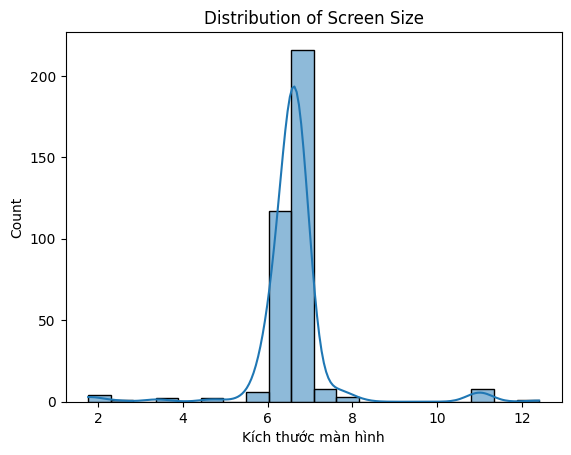

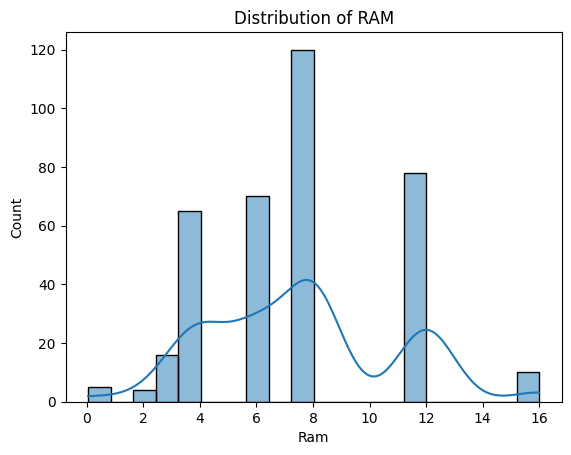

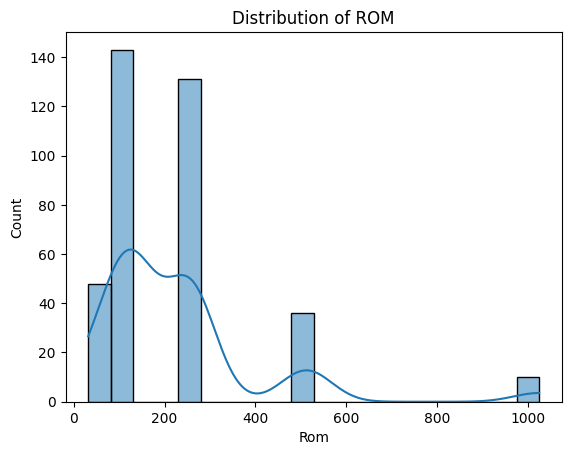

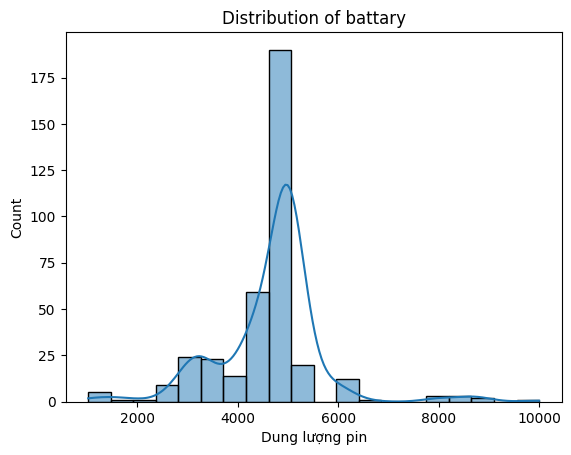

In [13]:
sns.histplot(df_['Kích thước màn hình'], bins=20, kde=True)
plt.title('Distribution of Screen Size')
plt.show()

sns.histplot(df_['Ram'], bins=20, kde=True)
plt.title('Distribution of RAM')
plt.show()

sns.histplot(df_['Rom'], bins=20, kde=True)
plt.title('Distribution of ROM')
plt.show()

sns.histplot(df_['Dung lượng pin'], bins=20, kde=True)
plt.title('Distribution of battary')
plt.show()

In [14]:
df_.shape

(368, 13)

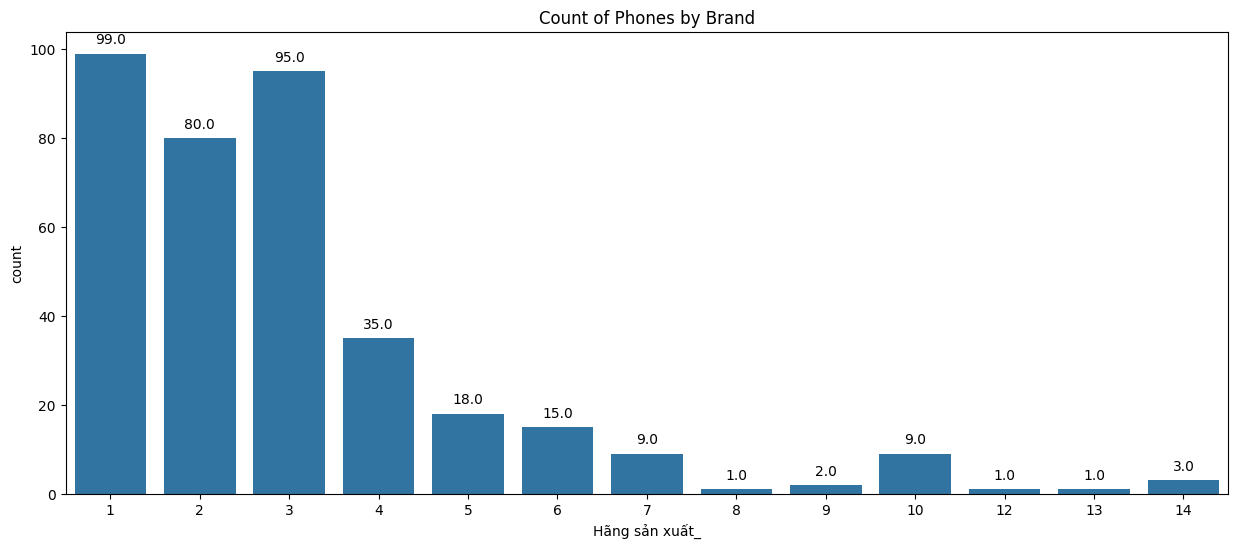

In [15]:
plt.figure(figsize=(15, 6))
ax1 = sns.countplot(x='Hãng sản xuất_', data=df_)
plt.title('Count of Phones by Brand')

for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.show()

Build Model

In [65]:
df_.isna().sum()

Tên sản phẩm           0
Hãng sản xuất          0
Rom                    0
Ram                    0
Chipset(CPU)           0
Kích thước màn hình    0
Độ phân giải Camera    0
Dung lượng pin         0
Giá                    0
Primary                0
Ultra_Wide             0
Telephoto              0
Hãng sản xuất_         0
dtype: int64

In [73]:
features = ['Hãng sản xuất_', 'Rom', 'Ram', 'Kích thước màn hình', 'Dung lượng pin', 'Primary', 'Ultra_Wide', 'Telephoto']
target = 'Giá'

X = df_[features]
y = df_[target]

In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('--Importing success')

--Importing success


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_xg = XGBRegressor()

cv_scores = cross_val_score(model_xg, X_train, y_train, cv=6, scoring='neg_mean_squared_error') 

model_xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [78]:
y_train_pred = model_xg.predict(X_train)

y_test_pred = model_xg.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Set Metrics:")
print(f"Mean Squared Error (MSE): {train_mse}")
print(f"Mean Absolute Error (MAE): {train_mae}")
print(f"R-squared (R²): {train_r2}")
print("\n")

print("Test Set Metrics:")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"R-squared (R²): {test_r2}")

Training Set Metrics:
Mean Squared Error (MSE): 907959547934.7941
Mean Absolute Error (MAE): 366898.0918367347
R-squared (R²): 0.9937129998528775


Test Set Metrics:
Mean Squared Error (MSE): 17677752192400.65
Mean Absolute Error (MAE): 2806459.743243243
R-squared (R²): 0.8888137900944533


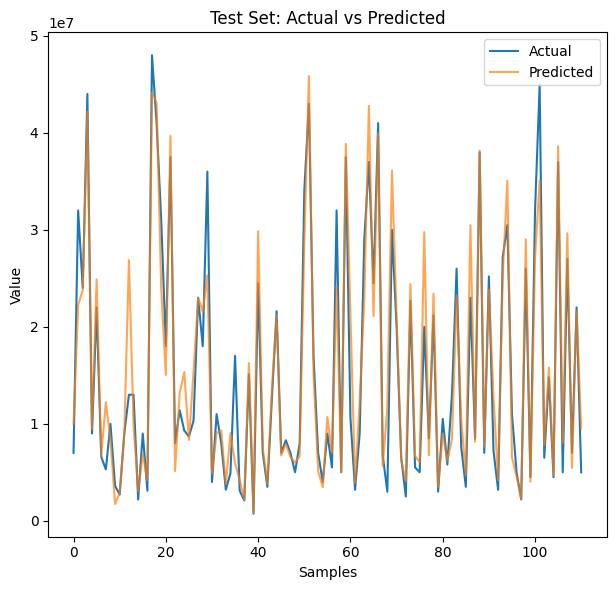

In [24]:
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ cho tập kiểm tra
plt.subplot(1, 2, 2)
plt.plot(y_test.values, label='Actual')
plt.plot(y_test_pred, label='Predicted', alpha=0.7)
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
import lightgbm as lgb

In [26]:
# Định nghĩa tham số mô hình
params = {
    'task': 'train',
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learning_rate': 0.05,
    'metric': {'l2', 'l1'},
    'verbose': -1
}

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Tải dữ liệu vào LightGBM
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)

# Huấn luyện mô hình
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval)

In [34]:
# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [35]:
# Tính các chỉ số cho tập huấn luyện
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Tính các chỉ số cho tập kiểm tra
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# In kết quả
print(f"Train MSE: {mse_train}")
print(f"Train RMSE: {rmse_train}")
print(f"Train R^2: {r2_train}")

print(f"Test MSE: {mse_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test R^2: {r2_test}")

Train MSE: 10160252569613.47
Train RMSE: 3187515.1089231675
Train R^2: 0.9301513193685617
Test MSE: 17285453679549.29
Test RMSE: 4157577.862115067
Test R^2: 0.8860753629394609


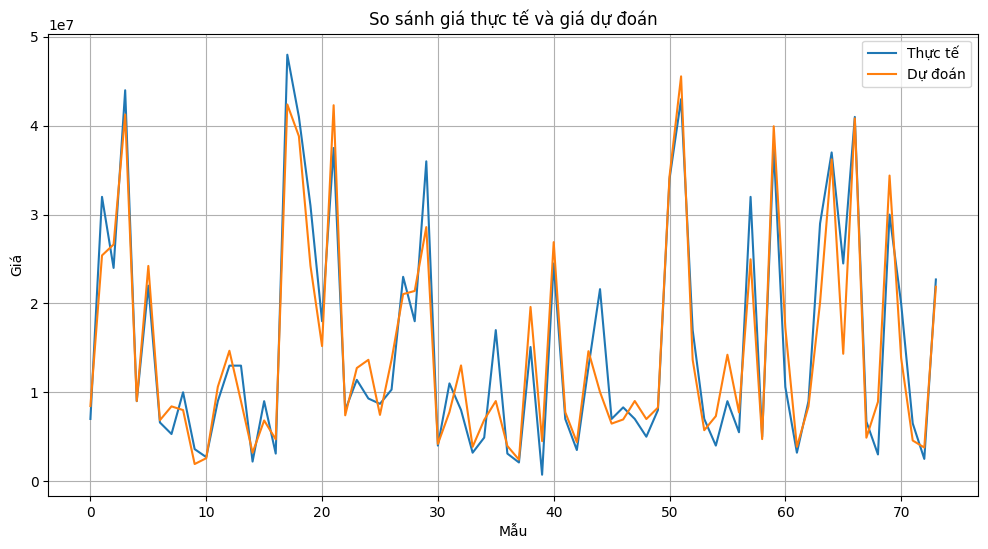

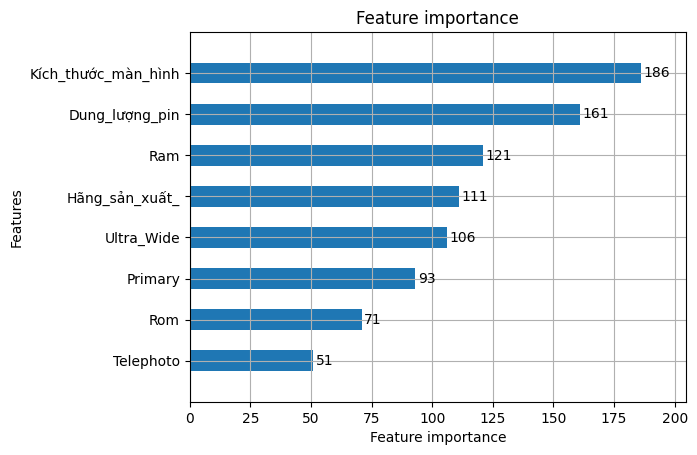

In [31]:
# Vẽ biểu đồ dự đoán
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label="Thực tế")
plt.plot(range(len(y_test)), y_test_pred, label="Dự đoán")
plt.title("So sánh giá thực tế và giá dự đoán")
plt.xlabel('Mẫu')
plt.ylabel('Giá')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Vẽ biểu đồ độ quan trọng của đặc trưng
lgb.plot_importance(model, height=.5)
plt.show()

Thu lai mo hinh best_model

In [43]:
import pickle

In [45]:
model = pickle.load(open('/home/hadoop/Predict-Phone-Price/ML/best_model.pkl', 'rb'))

In [50]:
X_train.columns = ['Hãng sản xuất', 'Bộ nhớ trong_', 'Ram_', 'man hinh', 'pin', 'Primary', 'Ultra_Wide', 'Telephoto']
X_test.columns = ['Hãng sản xuất', 'Bộ nhớ trong_', 'Ram_', 'man hinh', 'pin', 'Primary', 'Ultra_Wide', 'Telephoto']

In [51]:
y_train_pred = model.predict(X_train)

y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Set Metrics:")
print(f"Mean Squared Error (MSE): {train_mse}")
print(f"Mean Absolute Error (MAE): {train_mae}")
print(f"R-squared (R²): {train_r2}")
print("\n")

print("Test Set Metrics:")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"R-squared (R²): {test_r2}")

Training Set Metrics:
Mean Squared Error (MSE): 3812708170366.107
Mean Absolute Error (MAE): 776544.1016156463
R-squared (R²): 0.9735995982612341


Test Set Metrics:
Mean Squared Error (MSE): 6897078951500.182
Mean Absolute Error (MAE): 1388842.0287162163
R-squared (R²): 0.956620046503068


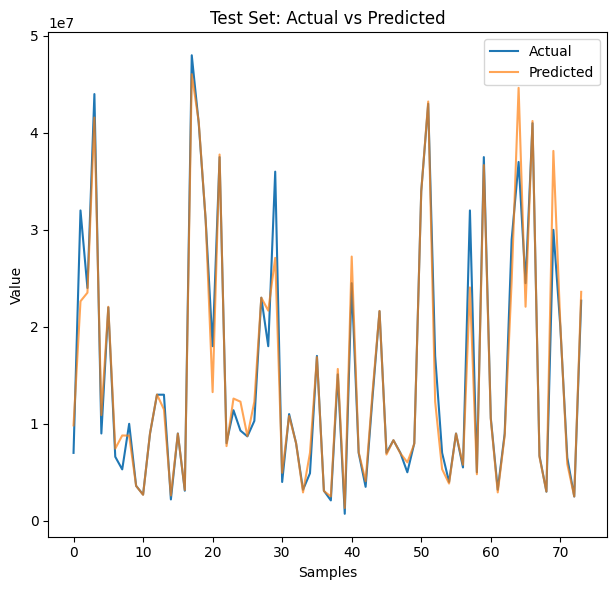

In [52]:
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ cho tập kiểm tra
plt.subplot(1, 2, 2)
plt.plot(y_test.values, label='Actual')
plt.plot(y_test_pred, label='Predicted', alpha=0.7)
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()